In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# for coloring
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  

for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.) 

In [5]:
df = pd.read_csv('h1b_kaggle.csv')

In [3]:
#Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    #start_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    #end_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    #print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [6]:
df = reduce_mem_usage(df)
df.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.00000,2016.0,"ANN ARBOR, MICHIGAN",-83.7500,42.28125
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.00000,2016.0,"PLANO, TEXAS",-96.6875,33.03125
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.00000,2016.0,"JERSEY CITY, NEW JERSEY",-74.0625,40.71875
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.00000,2016.0,"DENVER, COLORADO",-105.0000,39.75000
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.40625,2016.0,"ST. LOUIS, MISSOURI",-90.1875,38.62500


# EDA

In [7]:
print(df['YEAR'].unique())
print()
print(df['CASE_STATUS'].unique())
print()
print(df['EMPLOYER_NAME'].unique())
print()
print(df['SOC_NAME'].unique())
print()
print(df['JOB_TITLE'].unique())
print()

df.isnull().sum()

[2016. 2015. 2014. 2013. 2012. 2011.   nan]

['CERTIFIED-WITHDRAWN' 'WITHDRAWN' 'CERTIFIED' 'DENIED' 'REJECTED'
 'INVALIDATED' 'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED' nan]

['UNIVERSITY OF MICHIGAN' 'GOODMAN NETWORKS, INC.'
 'PORTS AMERICA GROUP, INC.' ...
 'ELEGANT SUPER STORES CORPORATE CORP (HDQTRS)' 'TELSEY CAPITAL GROUP LLC'
 'J. LOGAN INTERIORS']

['BIOCHEMISTS AND BIOPHYSICISTS' 'CHIEF EXECUTIVES' 'FINANCIAL MANAGERS'
 ... 'Tree Trimmers and Pruners'
 'Excavating and Loading Machine and Dragline Operat'
 'Earth Drillers, Except Oil and Gas']

['POSTDOCTORAL RESEARCH FELLOW' 'CHIEF OPERATING OFFICER'
 'CHIEF PROCESS OFFICER' ... 'APPRAISERS, REAL ESTATE'
 'SOFTWARE ENGINEER//DATA ARCHITECT' 'SYSWTEMS ADMINISTRATOR']



Unnamed: 0                 0
CASE_STATUS               13
EMPLOYER_NAME             59
SOC_NAME               17734
JOB_TITLE                 43
FULL_TIME_POSITION        15
PREVAILING_WAGE           85
YEAR                      13
WORKSITE                   0
lon                   107242
lat                   107242
dtype: int64

In [8]:
print(df['WORKSITE'].isna().sum())
df.describe()

0


,Unnamed: 0,PREVAILING_WAGE,YEAR,lon,lat
count,3.002458e+06,3.002373e+06,3002445.0,2.895216e+06,2.895216e+06
mean,1.501230e+06,1.472152e+05,NaN,NaN,NaN
std,8.667351e+05,5.286995e+06,NaN,0.000000e+00,0.000000e+00
min,1.000000e+00,0.000000e+00,2011.0,-1.578750e+02,1.343750e+01
25%,7.506152e+05,5.437100e+04,2012.0,-1.119375e+02,3.415625e+01
50%,1.501230e+06,6.502100e+04,2014.0,-8.618750e+01,3.909375e+01
75%,2.251844e+06,8.143200e+04,2015.0,-7.550000e+01,4.087500e+01
max,3.002458e+06,6.997607e+09,2016.0,1.457500e+02,6.481250e+01


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002458 entries, 0 to 3002457
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int32  
 1   CASE_STATUS         object 
 2   EMPLOYER_NAME       object 
 3   SOC_NAME            object 
 4   JOB_TITLE           object 
 5   FULL_TIME_POSITION  object 
 6   PREVAILING_WAGE     float32
 7   YEAR                float16
 8   WORKSITE            object 
 9   lon                 float16
 10  lat                 float16
dtypes: float16(3), float32(1), int32(1), object(6)
memory usage: 177.5+ MB


In [10]:
print("The shape of the dataset is : {}".format(df.shape))
print("There were around {} applications for H-1B Visa from 2011 to 2016.".format(df.shape[0]))

The shape of the dataset is : (3002458, 11)
There were around 3002458 applications for H-1B Visa from 2011 to 2016.


In [11]:
df.CASE_STATUS.value_counts()

CERTIFIED                                             2615623
CERTIFIED-WITHDRAWN                                    202659
DENIED                                                  94346
WITHDRAWN                                               89799
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

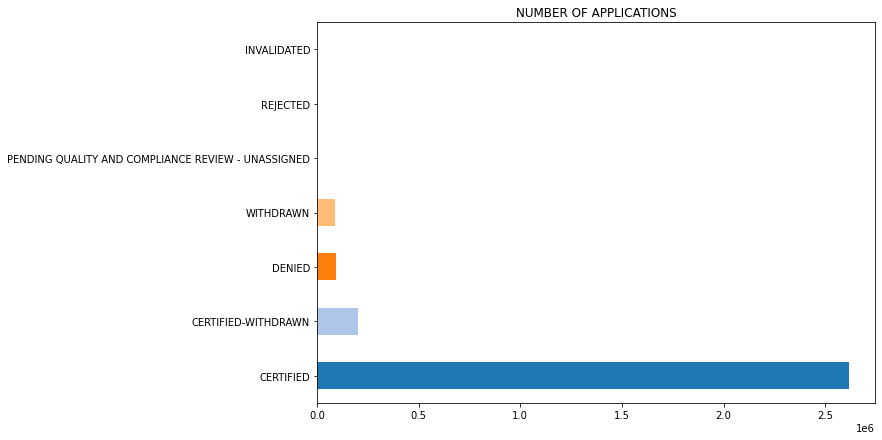

In [12]:
plt.figure(figsize=(10,7))
df.CASE_STATUS.value_counts().plot(kind='barh',  color=tableau20)
df.sort_values('CASE_STATUS')
plt.title("NUMBER OF APPLICATIONS")
plt.show()

<AxesSubplot:>

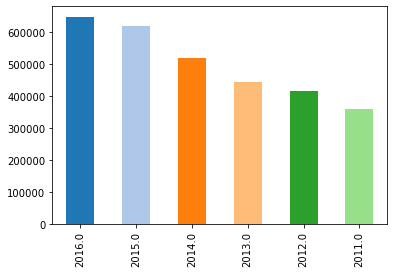

In [13]:
df.YEAR.value_counts().plot(kind = 'bar',color=tableau20)

In [14]:
df.columns

Index(['Unnamed: 0', 'CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

### Analyzing more number of top 10 employees

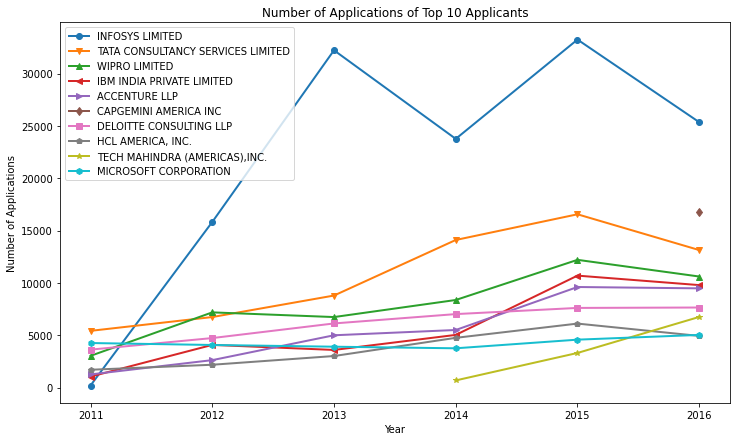

In [15]:
top_emp = list(df['EMPLOYER_NAME'][df['YEAR'] >= 2015].groupby(df['EMPLOYER_NAME']).count().sort_values(ascending=False).head(10).index)
byempyear = df[['EMPLOYER_NAME', 'YEAR', 'PREVAILING_WAGE']][df['EMPLOYER_NAME'].isin(top_emp)]
byempyear = byempyear.groupby([df['EMPLOYER_NAME'], df['YEAR']])

plt.figure(figsize=(12,7))

markers=['o','v','^','<','>','d','s','p','*','h','x','D','o','v','^','<','>','d','s','p','*','h','x','D']
for company in top_emp:
    tmp = byempyear.count().loc[company]
    plt.plot(tmp.index.values, tmp["PREVAILING_WAGE"].values, label=company, linewidth=2,marker=markers[top_emp.index(company)])
plt.xlabel("Year")
plt.ylabel("Number of Applications")
plt.legend()
plt.title('Number of Applications of Top 10 Applicants')
plt.show()


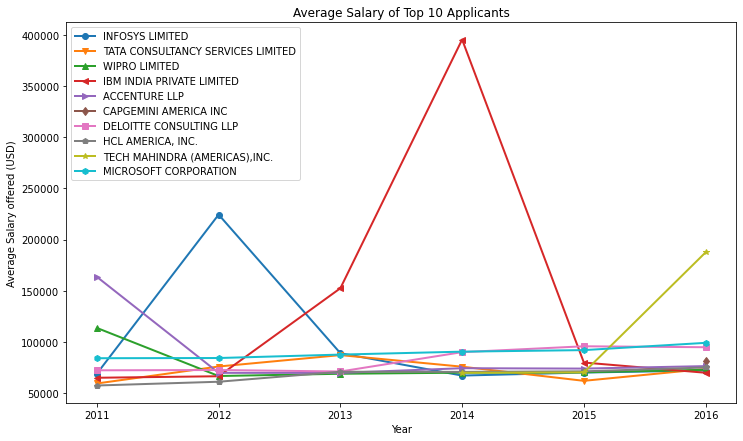

In [16]:
# average salary of each company
plt.figure(figsize=(12,7))

for company in top_emp:
    tmp = byempyear.mean().loc[company]
    plt.plot(tmp.index.values, tmp["PREVAILING_WAGE"].values, label=company, linewidth=2,marker=markers[top_emp.index(company)])
plt.xlabel("Year")
plt.ylabel("Average Salary offered (USD)")
plt.legend()
plt.title('Average Salary of Top 10 Applicants')
plt.show()

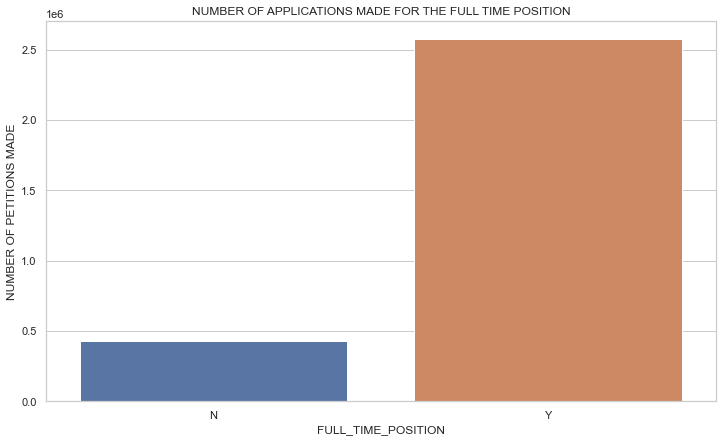

In [18]:
# full time vs half time
plt.figure(figsize=(12,7))
sns.set(style="whitegrid")
g = sns.countplot(x = 'FULL_TIME_POSITION', data = df)
plt.title("NUMBER OF APPLICATIONS MADE FOR THE FULL TIME POSITION")
plt.ylabel("NUMBER OF PETITIONS MADE")
plt.show()